In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:

%pip install torchvision
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

100.0%
100.0%
100.0%
100.0%


In [6]:
batch_size = 64
train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True  # Shuffle training data
)
test_loader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False  # No need to shuffle test data
)


In [7]:
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # First fully connected layer
        self.relu = nn.ReLU()          # ReLU activation
        self.fc2 = nn.Linear(256, 10)  # Second fully connected layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input tensor
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [8]:
import torch.optim as optim

# Initialize the model, loss function, and optimizer
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 2
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Print epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/2], Loss: 0.3023
Epoch [2/2], Loss: 0.1271


In [9]:
# Evaluation phase
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")

Accuracy on the test set: 96.90%


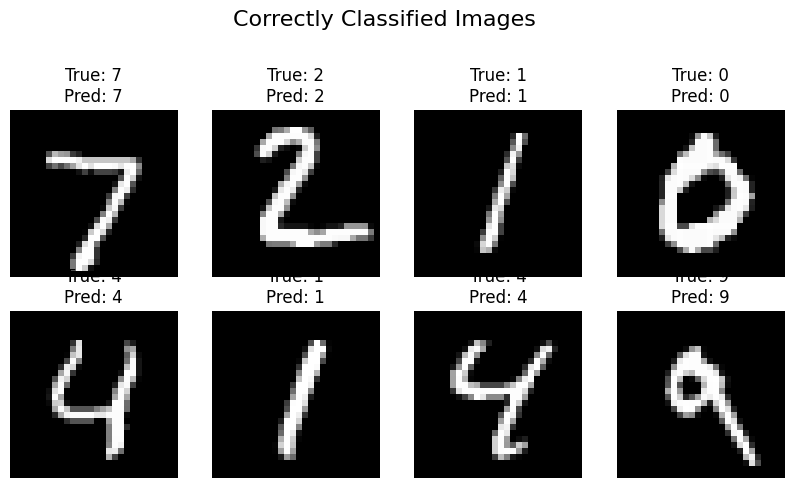

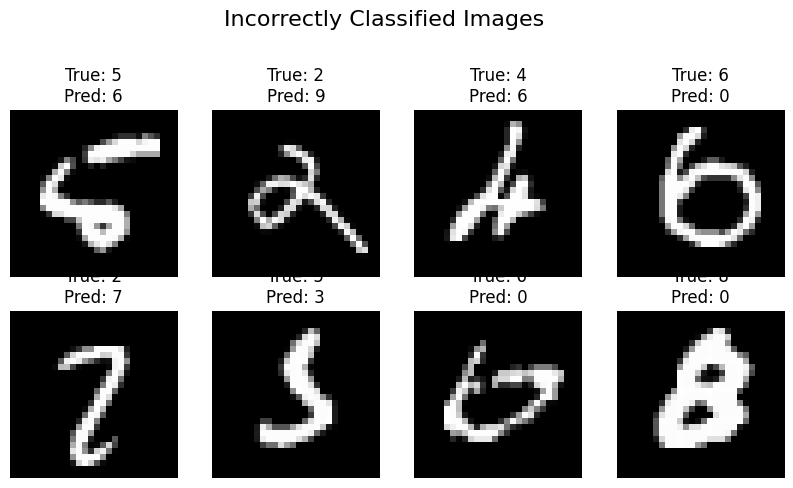

In [11]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, labels, predictions=None, title=None):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        label = f"True: {labels[i].item()}"
        if predictions is not None:
            label += f"\nPred: {predictions[i].item()}"
        plt.title(label)
        plt.axis('off')
    if title:
        plt.suptitle(title, fontsize=16)
    plt.show()

# Identify correctly classified images
correct_images = []
correct_labels = []
correct_predictions = []

incorrect_images = []
incorrect_labels = []
incorrect_predictions = []

model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        for i in range(len(targets)):
            if predicted[i] == targets[i]:
                correct_images.append(inputs[i])
                correct_labels.append(targets[i])
                correct_predictions.append(predicted[i])
            else:
                incorrect_images.append(inputs[i])
                incorrect_labels.append(targets[i])
                incorrect_predictions.append(predicted[i])

# Visualize correctly classified images
show_images(correct_images[:8], correct_labels[:8], correct_predictions[:8], title="Correctly Classified Images")

# Visualize incorrectly classified images
show_images(incorrect_images[:8], incorrect_labels[:8], incorrect_predictions[:8], title="Incorrectly Classified Images")
